# Univariate analysis on FMO2 data in GTEx

To compare with [m&m results](20180415_MNMASH_FMO2.html) I analyze the same data-set using [varbvs (`varbvsnorm`)](https://github.com/pcarbo/varbvs/blob/master/varbvs-R/R/varbvsnorm.R) and [susieR](https://github.com/stephenslab/susieR).

## Implementation 

I expanded my DSC in `src/model_dsc` to include these two new methods.

In [1]:
%cd ../src/model_dsc

/home/gaow/GIT/github/mvarbvs/src/model_dsc

In [2]:
./model.dsc -h


INFO: MODULES
+------------+---------------------+--------------------------------+-------------------+------+
|            |      parameters     |             input              |       output      | type |
+------------+---------------------+--------------------------------+-------------------+------+
|  get_data  |      data_file      |                                |        data       |  R   |
| original_Y |                     |              data              |        data       |  PY  |
|  init_mnm  | Sigma, (U, grid, p) |              data              |    data, model    |  R   |
|  fit_mnm   |      maxL, maxI     |          data, model           | fitted, posterior |  R   |
| fit_varbvs |    sa, maxL, maxI   |              data              | posterior, fitted |  R   |
|  diagnose  |                     | data, model, fitted, posterior |     diagnosed     |  R   |
| fit_susie  |    sa, maxL, maxI   |              data              | posterior, fitted |  R   |
+------------+-

See the [previous document on m&m](20180415_MNMASH_FMO2.html) for more details on the benchmark at this point.

In [3]:
./model.dsc

INFO: DSC script exported to mnm_model.html
INFO: Constructing DSC from ./model.dsc ...
INFO: Building execution graph & running DSC ...
DSC: 100%|██████████████████████████████████████| 10/10 [00:32<00:00,  3.71s/it]
INFO: Building DSC database ...
INFO: DSC complete!
INFO: Elapsed time 34.734 seconds.


Scripts for the DSC can be found [here](20180416_mnm_model.html). **Specifically look at the `fit_varbvs` and `fit_susie` modules for the new routines added.**

## Plot fine-mapping results for `varbvs`

In [2]:
res = readRDS('mnm_model/fit_varbvs/get_data_1_original_Y_1_init_mnm_1_fit_varbvs_1.rds')

In [3]:
dat = readRDS('mnm_model/init_mnm/get_data_1_original_Y_1_init_mnm_1.rds')
r2 = dat$data$r2

We focus on inferred posterior mean. We plot this quantity in both Thyroid and Lung tissues, annotated by PIP and LD structure.

In [4]:
post_mean = res$posterior$PosteriorMean
pip = 1 - res$posterior$lfdr

In [5]:
%get post_mean pip r2 --from R

Loading required package: feather


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_beta(yaxis, zaxis, ld, conf):
    xaxis = [x+1 for x in range(len(yaxis))]
    cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
    f, ax = plt.subplots(figsize=(18,5))
    points = ax.scatter(xaxis, yaxis, c=zaxis, cmap=cmap)
    f.colorbar(points, label=conf['zlabel'])
    if 'pip_cutoff' in conf:
        for idx, item in enumerate(zaxis):
            if item > conf['pip_cutoff']:
                ax.scatter(xaxis[idx], yaxis[idx], s=80, 
                           facecolors='none', edgecolors='r')
                for ii, xx in enumerate(ld[idx,:]):
                    if xx > conf['ld_cutoff1'] and xx < 1.0:
                        ax.scatter(xaxis[ii], yaxis[ii], 
                                   color='y', marker='+')
                for ii, xx in enumerate(ld[idx,:]):
                    if xx > conf['ld_cutoff2'] and xx < 1.0:
                        ax.scatter(xaxis[ii], yaxis[ii], 
                                   color='g', marker='x') 
    ax.set_title(conf['title'])
    ax.set_ylabel(conf['ylabel'])
    plt.gca()
    plt.show()

### Thyroid results

Top signals ($pip > 0.95$) are circled in red, with SNPs in LD with it ($r^2>0.1$) colored in yellow, ($r^2>0.6$) colored in green. 

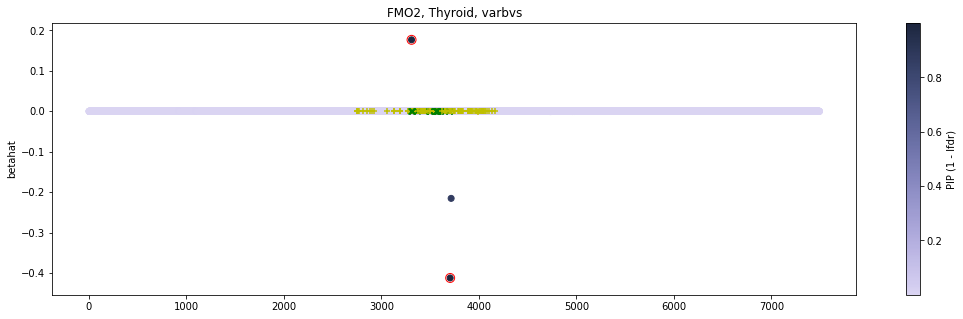

In [7]:
conf = {'title': 'FMO2, Thyroid, varbvs', 
        'ylabel': 'betahat', 
        'zlabel': 'PIP (1 - lfdr)',
        'pip_cutoff': 0.95,
        'ld_cutoff1': 0.1,
        'ld_cutoff2': 0.6}
plot_beta(post_mean[:,0], pip[:,0], r2, conf)

### Lung results

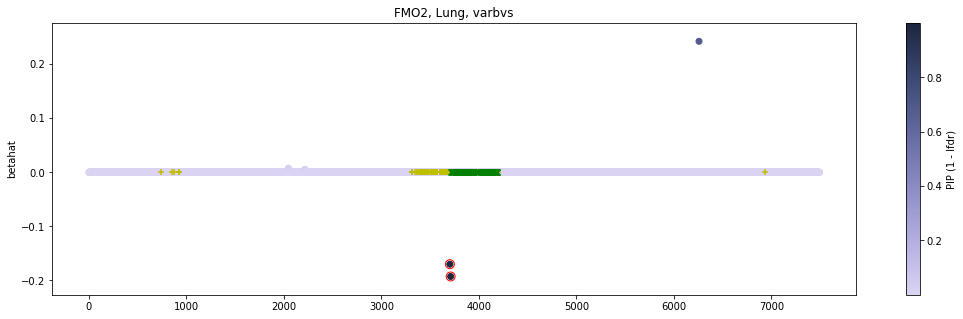

In [8]:
conf = {'title': 'FMO2, Lung, varbvs', 
        'ylabel': 'betahat', 
        'zlabel': 'PIP (1 - lfdr)',
        'pip_cutoff': 0.95,
        'ld_cutoff1': 0.1,
        'ld_cutoff2': 0.6}
plot_beta(post_mean[:,1], pip[:,1], r2, conf)

## Plot fine-mapping results for `susie`

In [9]:
res = readRDS('mnm_model/fit_susie/get_data_1_original_Y_1_init_mnm_1_fit_susie_1.rds')
post_mean = res$posterior$PosteriorMean
lfsr = res$posterior$lfsr

In [10]:
%get post_mean lfsr --from R

### Thyroid results

Top signals ($lfsr < 0.05$) are circled in red, with SNPs in LD with it ($r^2>0.1$) colored in yellow, ($r^2>0.6$) colored in green.

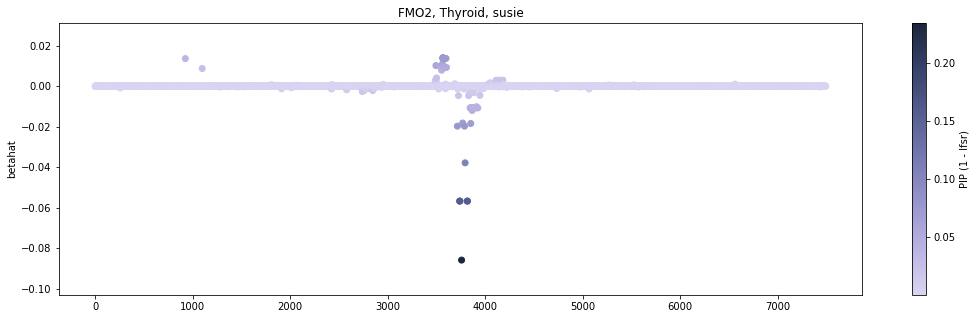

In [11]:
conf = {'title': 'FMO2, Thyroid, susie', 
        'ylabel': 'betahat', 
        'zlabel': 'PIP (1 - lfsr)',
        'pip_cutoff': 0.95,
        'ld_cutoff1': 0.1,
        'ld_cutoff2': 0.6}
plot_beta(post_mean[:,0], 1 - lfsr[:,0], r2, conf)

### Lung results

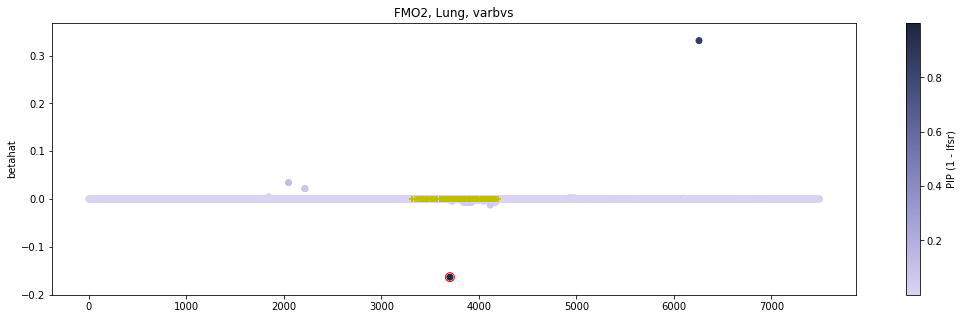

In [12]:
conf = {'title': 'FMO2, Lung, varbvs', 
        'ylabel': 'betahat', 
        'zlabel': 'PIP (1 - lfsr)',
        'pip_cutoff': 0.95,
        'ld_cutoff1': 0.1,
        'ld_cutoff2': 0.6}
plot_beta(post_mean[:,1], 1 - lfsr[:,1], r2, conf)